In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
from model_evaluation_methods import *
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import cross_val_score

df = pd.read_csv('cleaned_cancer.csv')
df = df.drop(['index', 'Patient Id'], axis=1)


X = df.drop('Level', axis=1)
y = df['Level']


In [2]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


Naive Bayes model Evaluation for Feature Selection:
Accuracy: 0.9105263157894737
Error Rate: 0.08947368421052626
Sensitivity (Recall): 0.9105263157894737
Precision: 0.9117577528700118
F-measure: 0.9086211291699355


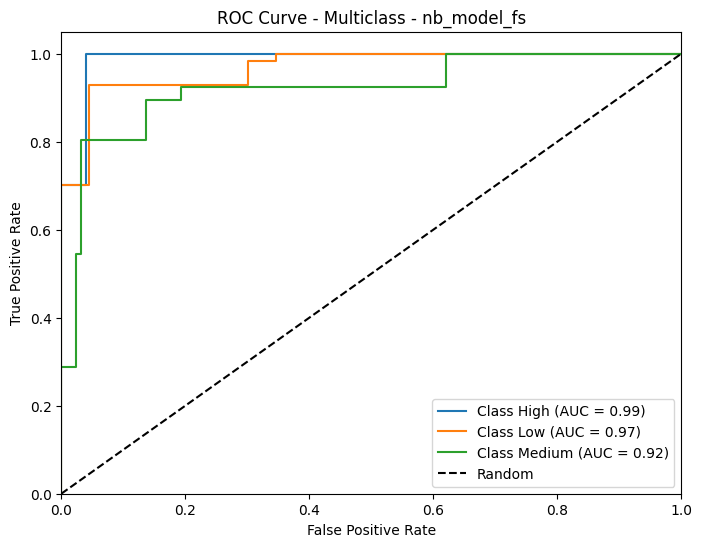

Training vs Testing Accuracy Comparison:
Feature Selection - Training Accuracy: 0.8947368421052632 Testing Accuracy: 0.9105263157894737
Cross-Validation Scores:
Feature Selection - Mean CV Accuracy: 0.894736842105263


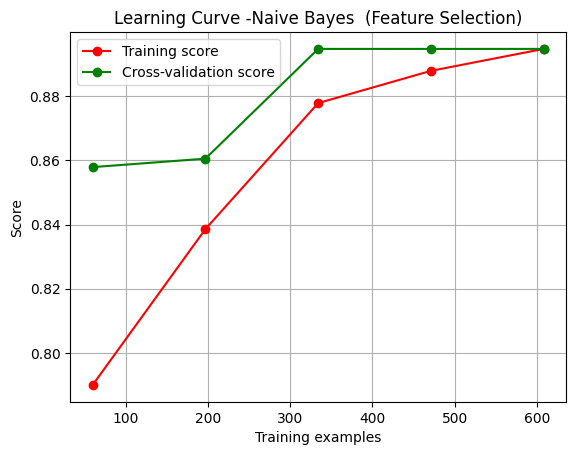

In [3]:
selector = SelectKBest(mutual_info_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

nb_model_fs = GaussianNB()
nb_model_fs.fit(X_train_selected, y_train)
y_pred_fs = nb_model_fs.predict(X_test_selected)

conf_matrix_fs = confusion_matrix(y_test, y_pred_fs)
error_rate_fs = calculate_error_rate(conf_matrix_fs)
sensitivity_fs, precision_fs, f_measure_fs = calculate_metrics(y_test, y_pred_fs)
accuracy_fs = accuracy_score(y_test, y_pred_fs)

print("Naive Bayes model Evaluation for Feature Selection:")
print("Accuracy:", accuracy_fs)
print("Error Rate:", error_rate_fs)
print("Sensitivity (Recall):", sensitivity_fs)
print("Precision:", precision_fs)
print("F-measure:", f_measure_fs)

plot_roc_curve_multiclass(y_test, nb_model_fs.predict_proba(X_test_selected), nb_model_fs.classes_,'nb_model_fs')

y_train_pred_fs = nb_model_fs.predict(X_train_selected)

train_accuracy_fs = accuracy_score(y_train, y_train_pred_fs)

print("Training vs Testing Accuracy Comparison:")

print("Feature Selection - Training Accuracy:", train_accuracy_fs, "Testing Accuracy:", accuracy_fs)

cv_scores_fs = cross_val_score(nb_model_fs, X_train_selected, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")

print("Feature Selection - Mean CV Accuracy:", np.mean(cv_scores_fs))

plot_learning_curve(nb_model_fs, "Learning Curve -Naive Bayes  (Feature Selection)", X_train_selected, y_train)

plt.show()




Naive Bayes model Evaluation for PCA:
Accuracy: 0.9842105263157894
Error Rate: 0.015789473684210575
Sensitivity (Recall): 0.9842105263157894
Precision: 0.9844346652584639
F-measure: 0.9842043722205921


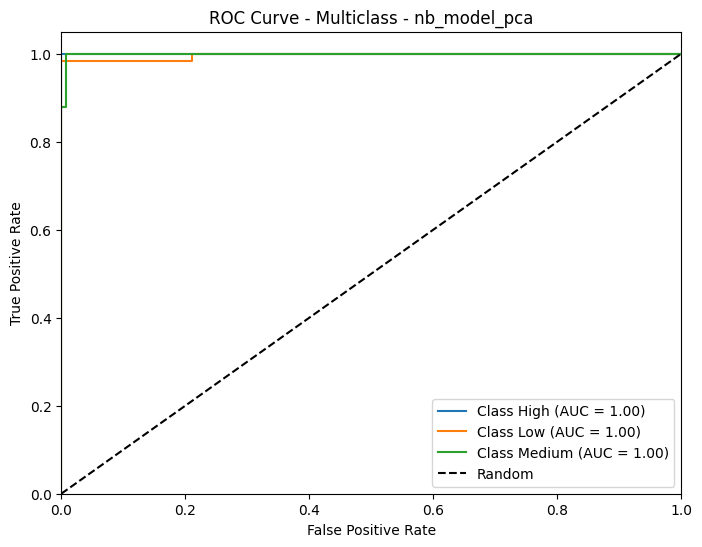

Training vs Testing Accuracy Comparison:
PCA - Training Accuracy: 0.9644736842105263 Testing Accuracy: 0.9842105263157894
Cross-Validation Scores:
PCA - Mean CV Accuracy: 0.9631578947368421


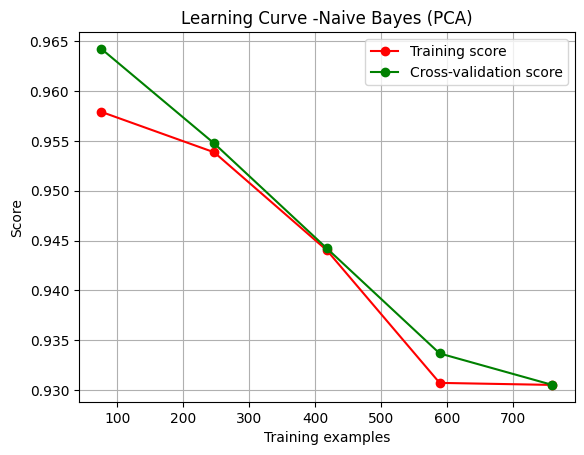

In [4]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

nb_model_pca = GaussianNB()
nb_model_pca.fit(X_train_pca, y_train)
y_pred_pca = nb_model_pca.predict(X_test_pca)

conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)
error_rate_pca = calculate_error_rate(conf_matrix_pca)
sensitivity_pca, precision_pca, f_measure_pca = calculate_metrics(y_test, y_pred_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("\nNaive Bayes model Evaluation for PCA:")
print("Accuracy:", accuracy_pca)
print("Error Rate:", error_rate_pca)
print("Sensitivity (Recall):", sensitivity_pca)
print("Precision:", precision_pca)
print("F-measure:", f_measure_pca)

plot_roc_curve_multiclass(y_test, nb_model_pca.predict_proba(X_test_pca), nb_model_pca.classes_,'nb_model_pca')

y_train_pred_pca = nb_model_pca.predict(X_train_pca)

train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)

print("Training vs Testing Accuracy Comparison:")

print("PCA - Training Accuracy:", train_accuracy_pca, "Testing Accuracy:", accuracy_pca)

cv_scores_pca = cross_val_score(nb_model_pca, X_train_pca, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")

print("PCA - Mean CV Accuracy:", np.mean(cv_scores_pca))

plot_learning_curve(nb_model_pca, "Learning Curve -Naive Bayes (PCA)", X_train_pca, y)

plt.show()



Naive Bayes model Evaluation for Full Dataset:
Accuracy: 0.968421052631579
Error Rate: 0.03157894736842104
Sensitivity (Recall): 0.968421052631579
Precision: 0.9693334081472337
F-measure: 0.9683100865004337


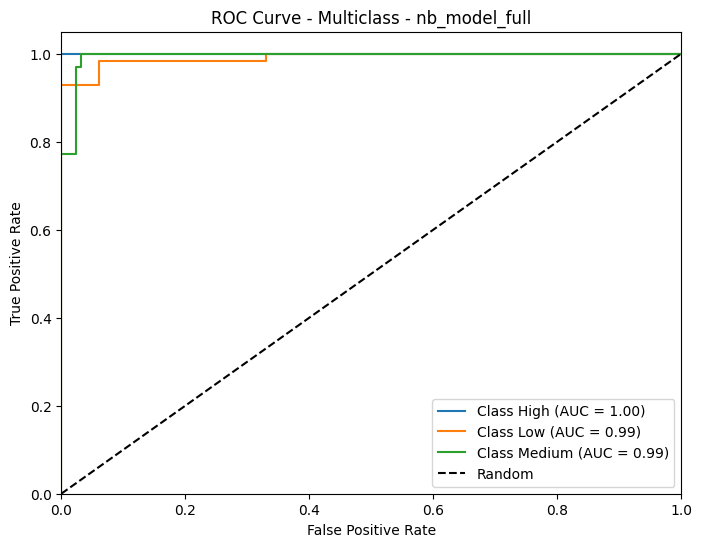

Training vs Testing Accuracy Comparison:
Full Dataset - Training Accuracy: 0.9605263157894737 Testing Accuracy: 0.968421052631579
Cross-Validation Scores:
Full Dataset - Mean CV Accuracy: 0.9381578947368421


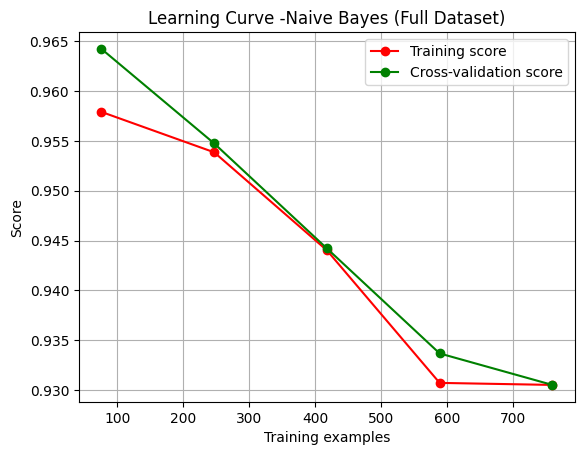

In [5]:
nb_model_full = GaussianNB()
nb_model_full.fit(X_train, y_train)
y_pred_full = nb_model_full.predict(X_test)

conf_matrix_full = confusion_matrix(y_test, y_pred_full)
error_rate_full = calculate_error_rate(conf_matrix_full)
sensitivity_full, precision_full, f_measure_full = calculate_metrics(y_test, y_pred_full)
accuracy_full = accuracy_score(y_test, y_pred_full)

print("\nNaive Bayes model Evaluation for Full Dataset:")
print("Accuracy:", accuracy_full)
print("Error Rate:", error_rate_full)
print("Sensitivity (Recall):", sensitivity_full)
print("Precision:", precision_full)
print("F-measure:", f_measure_full)

plot_roc_curve_multiclass(y_test, nb_model_full.predict_proba(X_test), nb_model_full.classes_,'nb_model_full')

y_train_pred_full = nb_model_full.predict(X_train)

train_accuracy_full = accuracy_score(y_train, y_train_pred_full)

print("Training vs Testing Accuracy Comparison:")

print("Full Dataset - Training Accuracy:", train_accuracy_full, "Testing Accuracy:", accuracy_full)

cv_scores_full = cross_val_score(nb_model_full, X_train, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")

print("Full Dataset - Mean CV Accuracy:", np.mean(cv_scores_full))

plot_learning_curve(nb_model_full, "Learning Curve -Naive Bayes (Full Dataset)",X_train,y)

plt.show()
